# KNN no `chb19_com_dwt`

Explorando 20 rodadas de classificação com `KNN` em sua configuração padrão com o dataframe extraído com DWT para encontrar canal com melhor desempenho.

Por fim salvando a tabela com médias, desvios padrão e medianas do desempenho de cada canal.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_array = np.load('./../20_seeds.npy')
print(f'seeds: {seed_array}')

seeds: [4382 8968 8442 1729  290  490 2128 1167 8900 5078 1359  894 7809 6990
 3623 5906 1687 7080 5473 7854]


## 20 rodadas

In [2]:
chb_DF = pd.read_csv('./chb19_com_dwt.csv')
target_S = chb_DF.pop('target')

accuracy_DF = pd.DataFrame()

# agrupa todas colunas pelo mesmo número do canal
colunas_agrupadas_por_numero = []
for i in range(18):
    colunas_agrupadas_por_numero.append(
        [column for column in chb_DF.columns if f'{i}' in column.split('-')]
    )

for numero_da_coluna, colunas in enumerate(colunas_agrupadas_por_numero):
    X, y = chb_DF[colunas].values, target_S.values

    acc = []   

    for seed in seed_array:
        # Distribuindo os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        
        # Instanciando e treinando classificador
        model = KNeighborsClassifier().fit(X_train, y_train)

        # Adicionando resultados às respectivas listas
        acc.append(model.score(X_test, y_test))

    accuracy_DF[f'{numero_da_coluna}'] = acc

accuracy_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.871429,0.857143,0.842857,0.757143,0.857143,0.800000,0.757143,0.771429,0.871429,0.885714,0.857143,0.828571,0.900000,0.900000,0.885714,0.828571,0.857143,0.900000
1,0.842857,0.871429,0.914286,0.885714,0.885714,0.857143,0.800000,0.814286,0.871429,0.885714,0.857143,0.842857,0.942857,0.842857,0.871429,0.928571,0.885714,0.914286
2,0.900000,0.885714,0.957143,0.871429,0.928571,0.900000,0.828571,0.857143,0.942857,0.942857,0.914286,0.914286,0.971429,0.928571,0.942857,0.928571,0.914286,0.985714
3,0.900000,0.900000,0.942857,0.842857,0.857143,0.871429,0.828571,0.828571,0.885714,0.857143,0.928571,0.885714,0.928571,0.871429,0.857143,0.914286,0.900000,0.914286
4,0.957143,0.942857,0.928571,0.871429,0.928571,0.842857,0.828571,0.857143,0.971429,0.957143,0.928571,0.900000,1.000000,0.942857,0.928571,0.942857,0.900000,0.928571
5,0.914286,0.900000,0.900000,0.842857,0.928571,0.800000,0.857143,0.842857,0.928571,0.928571,0.857143,0.871429,0.971429,0.900000,0.885714,0.871429,0.914286,0.900000
6,0.857143,0.885714,0.842857,0.885714,0.871429,0.785714,0.800000,0.814286,0.842857,0.942857,0.871429,0.871429,0.885714,0.871429,0.857143,0.885714,0.842857,0.857143
7,0.800000,0.842857,0.828571,0.857143,0.885714,0.814286,0.742857,0.728571,0.885714,0.914286,0.828571,0.800000,0.900000,0.828571,0.871429,0.857143,0.800000,0.900000
8,0.900000,0.857143,0.928571,0.900000,0.928571,0.828571,0.800000,0.857143,0.957143,0.957143,0.928571,0.857143,0.957143,0.914286,0.942857,0.914286,0.885714,0.885714
9,0.928571,0.942857,0.900000,0.957143,0.900000,0.942857,0.857143,0.857143,0.971429,0.942857,0.900000,0.885714,0.942857,0.957143,0.942857,0.914286,0.871429,0.928571


,count,mean,std,min,25%,50%,75%,max
12,20.0,0.932143,0.034020,0.871429,0.900000,0.935714,0.957143,1.000000
9,20.0,0.917857,0.029633,0.857143,0.896429,0.921429,0.942857,0.957143
17,20.0,0.911429,0.028421,0.857143,0.900000,0.914286,0.928571,0.985714
13,20.0,0.905714,0.041559,0.828571,0.871429,0.914286,0.928571,0.985714
8,20.0,0.897143,0.044117,0.828571,0.871429,0.885714,0.932143,0.971429
15,20.0,0.897143,0.032642,0.828571,0.871429,0.914286,0.917857,0.942857
4,20.0,0.895000,0.035382,0.800000,0.871429,0.892857,0.928571,0.942857
14,20.0,0.895000,0.033189,0.842857,0.871429,0.885714,0.932143,0.942857
2,20.0,0.885000,0.039729,0.828571,0.842857,0.885714,0.917857,0.957143
10,20.0,0.882857,0.038389,0.800000,0.857143,0.871429,0.914286,0.957143


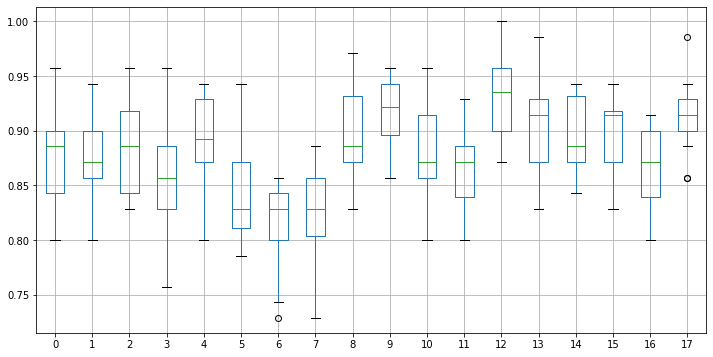

In [3]:
accuracy_DF.boxplot(figsize=(12, 6))
accuracy_DF.describe().transpose().sort_values(by='mean', ascending=False)

## Salvando rank em arquivo csv

In [4]:
save_DF = accuracy_DF.describe().transpose()[['mean', 'std', '50%']]
save_DF['chb'] = '19'
save_DF['channel'] = save_DF.index

save_DF.to_csv(path_or_buf='./knn_descr_channel_rank.csv', index=False)
save_DF

,mean,std,50%,chb,channel
0,0.875714,0.041996,0.885714,19,0
1,0.875000,0.037618,0.871429,19,1
2,0.885000,0.039729,0.885714,19,2
3,0.857857,0.045760,0.857143,19,3
4,0.895000,0.035382,0.892857,19,4
5,0.840000,0.040565,0.828571,19,5
6,0.814286,0.040406,0.828571,19,6
7,0.819286,0.042296,0.828571,19,7
8,0.897143,0.044117,0.885714,19,8
9,0.917857,0.029633,0.921429,19,9
